In [ ]:
# In this project I'll run exploratory data analysis on a dataset taken from the internet. 

# I will also visualize a portion of the data to see what story it tells. I'll answer a few questions, for example:
# - What genres sell best globally?
# - Are there regional differences in game preferences?
# - Which platforms dominate sales in Japan vs. Europe?

# I will use pandas, seaborn, matplotlib and numpy.

In [ ]:
# About the dataset:
# It contains a list of video games with sales greater than 10,000 copies.

# Fields include: 

# - Rank - Ranking of overall sales
# - Name - The games name
# - Platform - Platform of the games release (i.e. PC,PS4, etc.)
# - Year - Year of the game's release
# - Genre - Genre of the game
# - Publisher - Publisher of the game
# - NA_Sales - Sales in North America (in millions)
# - EU_Sales - Sales in Europe (in millions)
# - JP_Sales - Sales in Japan (in millions)
# - Other_Sales - Sales in the rest of the world (in millions)
# - Global_Sales - Total worldwide sales.

In [1]:
import pandas as pd

In [2]:
# STEP 1: Importing the dataset:
df = pd.read_csv('/Users/agnesevalmaggia/Desktop/kaggle/vgsales.csv')
print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [3]:
# STEP 2: First look at the data: first 5 rows
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
# Last 5 rows
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [5]:
# Dimensions of my dataframe:
rows = df.shape[0]
columns = df.shape[1]
print('This dataset has ' + str(rows) + ' rows and ' + str(columns) + ' columns')

This dataset has 16598 rows and 11 columns


In [6]:
# I want to see the list of column headers:
df.columns.tolist()

['Rank',
 'Name',
 'Platform',
 'Year',
 'Genre',
 'Publisher',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales']

In [7]:
# STEP 3: Missing values check and cleanup:
# Are there any missing values - how many - where?
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
# I want to drop the rows with missing values, because I want to work on a complete dataset.
# Since the amount of rows with missing values is relatively small, dropping them doesn't significally reduce the dataset.
df.dropna(subset=['Year', 'Publisher'], inplace=True)

In [9]:
# Are they gone?
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [10]:
# Are there any duplicates?
df.duplicated().sum()

np.int64(0)

In [11]:
# New dimensions of my dataframe:
rows = df.shape[0]
columns = df.shape[1]
print('This dataset has ' + str(rows) + ' rows and ' + str(columns) + ' columns')

This dataset has 16291 rows and 11 columns


In [12]:
# Short summary of the dataframe:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [13]:
# STEP 4: Statistical overviews
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [14]:
df.describe(include="all")

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291,16291,16291.000000,16291,16291,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
unique,NaN,11325,31,NaN,12,576,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2131,NaN,3251,1339,NaN,NaN,NaN,NaN,NaN
mean,8290.190228,NaN,NaN,2006.405561,NaN,NaN,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,NaN,NaN,5.832412,NaN,NaN,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.480000


In [15]:
# How many unique values do I have?
df.nunique()

Rank            16291
Name            11325
Platform           31
Year               39
Genre              12
Publisher         576
NA_Sales          408
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      621
dtype: int64

In [16]:
# STEP 5: Visualizations:
# Now I'll start exploring the data. I need to import a few libraries for this:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# I want to see how the global sales changed over time.
# First I need to group the sales per year so I create a new dataframe:
df_sales_per_year = df.groupby(by=['Year'])['Global_Sales'].sum().reset_index(name='Sales Count')
df_sales_per_year.head()

,Year,Sales Count
0,1980.0,11.38
1,1981.0,35.77
2,1982.0,28.86
3,1983.0,16.79
4,1984.0,50.36


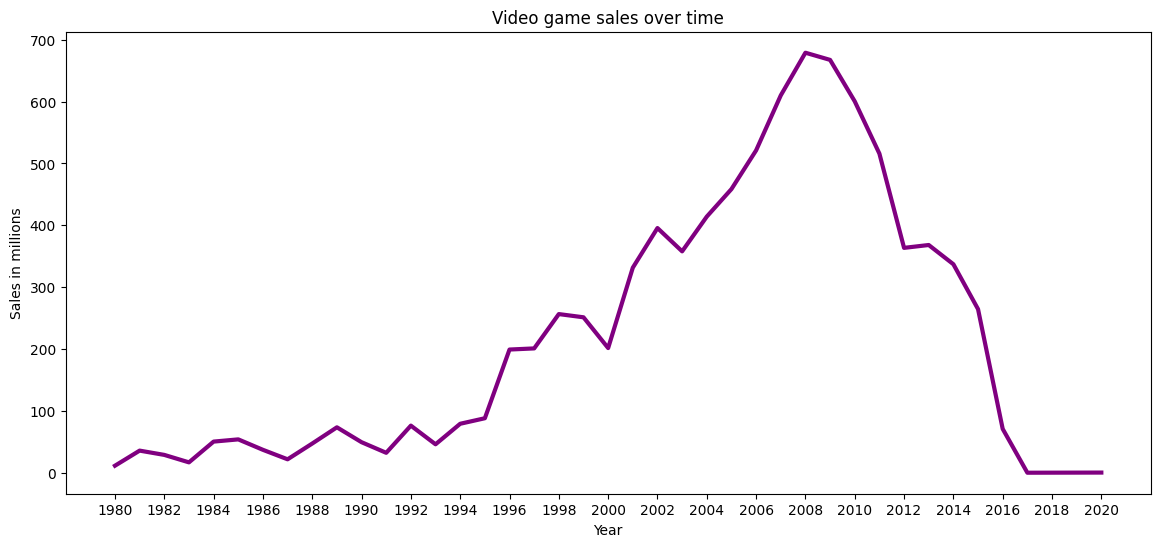

In [18]:
# I make a line plot
plt.figure(figsize=(14, 6))
plt.plot(df_sales_per_year['Year'], df_sales_per_year['Sales Count'], color = 'purple', linewidth = 3)
plt.title('Video game sales over time')
plt.xlabel('Year')
plt.ylabel('Sales in millions')
plt.xticks(np.arange(1980, 2021, step=2))
plt.show()

In [ ]:
# I see a very big peak in 2008, followed by a gradual decline over the next 10 years.

In [19]:
# I want to see how the global sales changed over time in Europe.
# I need a dataframe with the European sales:
df_eu_sales_per_year = df.groupby(by=['Year'])['EU_Sales'].sum().reset_index(name='EU Sales Count')
df_eu_sales_per_year.head()

,Year,EU Sales Count
0,1980.0,0.67
1,1981.0,1.96
2,1982.0,1.65
3,1983.0,0.80
4,1984.0,2.10


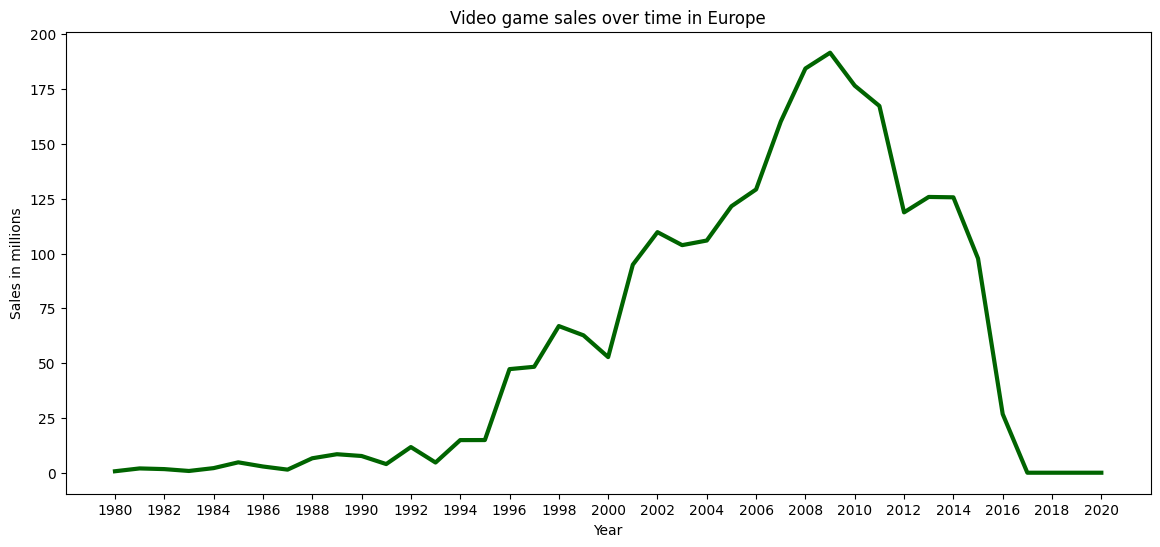

In [20]:
# I make a line plot
plt.figure(figsize=(14, 6))
plt.plot(df_sales_per_year['Year'], df_eu_sales_per_year['EU Sales Count'], color = 'darkgreen', linewidth = 3)
plt.title('Video game sales over time in Europe')
plt.xlabel('Year')
plt.ylabel('Sales in millions')
plt.xticks(np.arange(1980, 2021, step=2))
plt.show()

In [ ]:
# In Europe, the peak happens in 2009 instead of 2008, but the general trend is very similar to the global one.
# However, to analyse it better it would be handy to have both lines in the same chart:

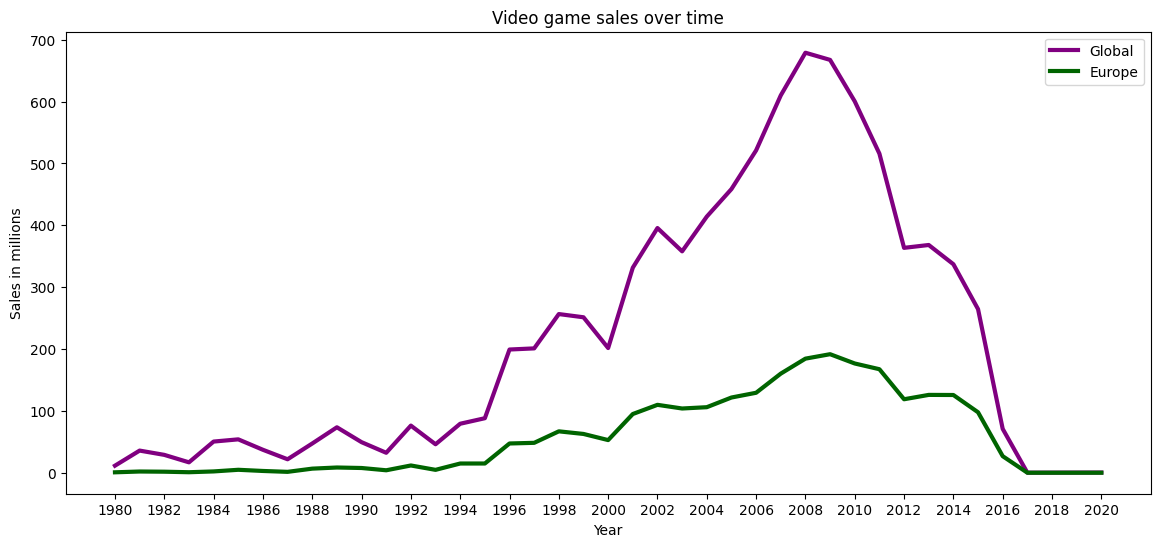

In [21]:
plt.figure(figsize=(14, 6))
plt.plot(df_sales_per_year['Year'], df_sales_per_year['Sales Count'], color = 'purple', linewidth = 3, label ='Global')
plt.plot(df_sales_per_year['Year'], df_eu_sales_per_year['EU Sales Count'], color = 'darkgreen', linewidth = 3, label = 'Europe')
plt.title('Video game sales over time')
plt.xlabel('Year')
plt.ylabel('Sales in millions')
plt.xticks(np.arange(1980, 2021, step=2))
plt.legend()
plt.show()

In [22]:
# Now I want to see the distribution of video games among genres.
# I'll create a dedicated dataframe: 
df_genre = df.groupby(by=['Genre'])['Genre'].count().sort_values(ascending=False).reset_index(name='Count')
df_genre

,Genre,Count
0,Action,3251
1,Sports,2304
2,Misc,1686
3,Role-Playing,1470
4,Shooter,1282
5,Adventure,1274
6,Racing,1225
7,Platform,875
8,Simulation,848
9,Fighting,836


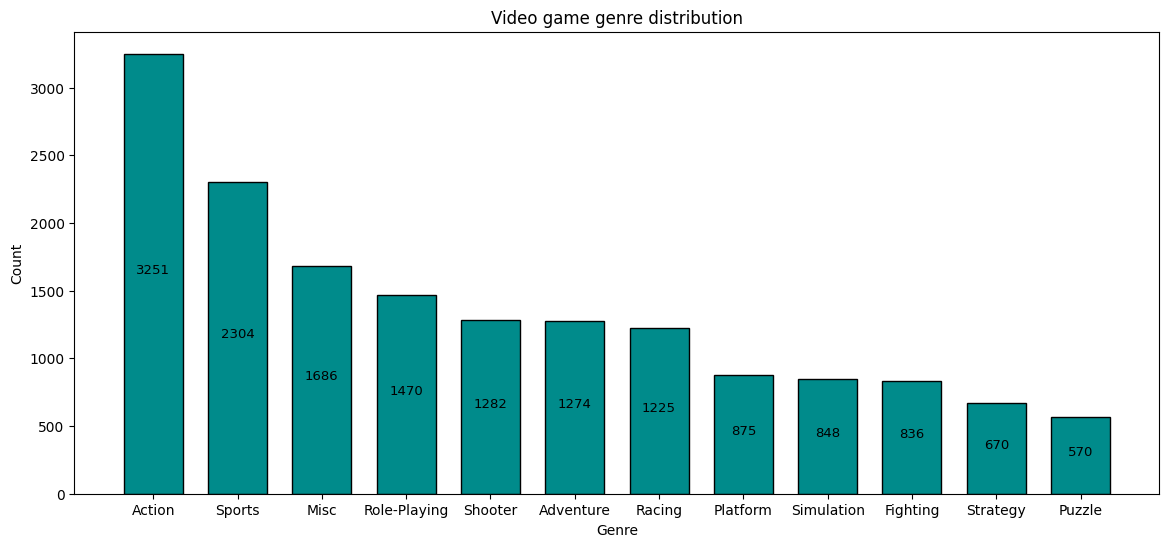

In [63]:
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i] // 2, y[i], ha='center', size = 9.5)

plt.figure(figsize=(14, 6))
plt.bar(df_genre['Genre'], df_genre['Count'], color = 'darkcyan', edgecolor = 'black', width = 0.7)
add_labels(df_genre['Genre'], df_genre['Count'])
plt.title('Video game genre distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [64]:
# I want to see which genres sell more, globally.
df_genre_sales = df.groupby(by=['Genre'])['Global_Sales'].sum().sort_values(ascending=False).reset_index(name='Sales Count')
df_genre_sales

,Genre,Sales Count
0,Action,1722.84
1,Sports,1309.24
2,Shooter,1026.20
3,Role-Playing,923.83
4,Platform,829.13
5,Misc,789.87
6,Racing,726.76
7,Fighting,444.05
8,Simulation,389.98
9,Puzzle,242.21


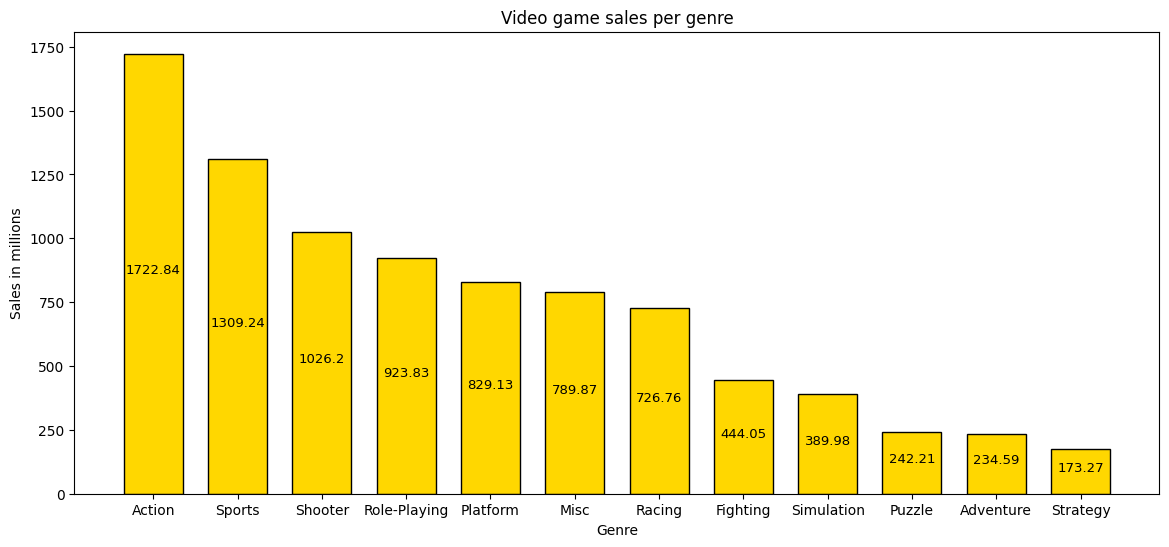

In [59]:
plt.figure(figsize=(14, 6))
plt.bar(df_genre_sales['Genre'], df_genre_sales['Sales Count'], color = 'gold', edgecolor = 'black', width = 0.7)
add_labels(df_genre_sales['Genre'], df_genre_sales['Sales Count'])
plt.title('Video game sales per genre')
plt.xlabel('Genre')
plt.ylabel('Sales in millions')
plt.show()

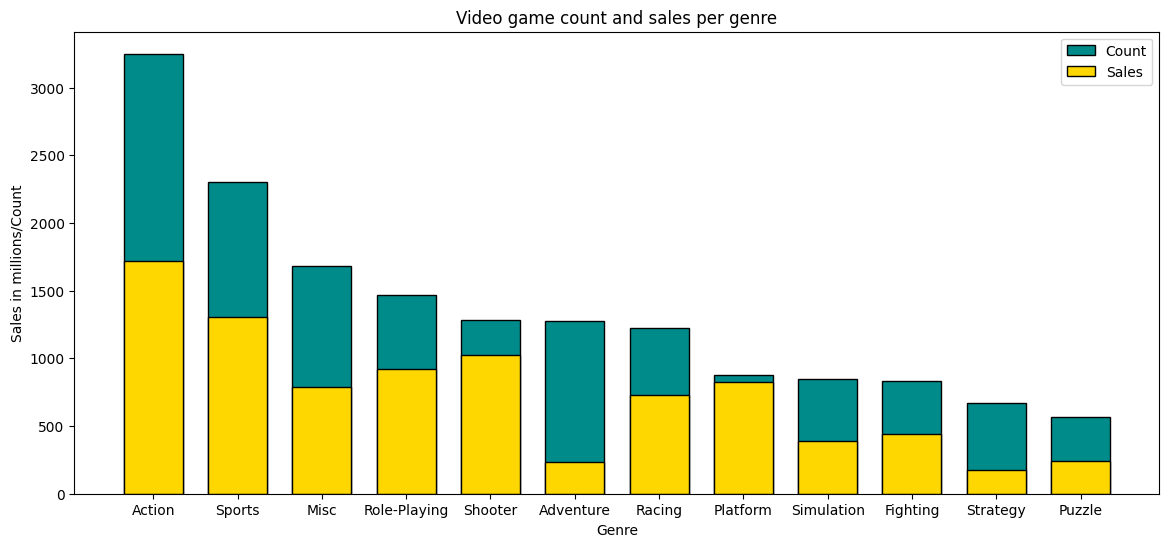

In [26]:
# I want to compare the two:
plt.figure(figsize=(14, 6))
plt.bar(df_genre['Genre'], df_genre['Count'], width=0.7, color = 'darkcyan', edgecolor = 'black', label='Count')
plt.bar(df_genre_sales['Genre'], df_genre_sales['Sales Count'], width=0.7, color = 'gold', edgecolor = 'black', label='Sales')
plt.title('Video game count and sales per genre')
plt.xlabel('Genre')
plt.ylabel('Sales in millions/Count')
plt.legend()
plt.show()

In [30]:
# I can see how the most sold games (action, sport) are also the most present on the market.
# I can also see that the genre with less competition (sales and offer more balanced) is the platform genre.
# I also notice that the adventure games are the ones with the biggest gap between sales and counts, followed by strategy games. Therefore, I would suggest not to invest in these genres at the moment.

In [27]:
# Now I want to have some geographical information: how are the total sales distribuited geographically?
Total_NA = df['NA_Sales'].sum()
Total_EU = df['EU_Sales'].sum()
Total_JP = df['JP_Sales'].sum()
Total_other = df['Other_Sales'].sum()
sales_geo = {'North America':[Total_NA], 'Europe':[Total_EU], 'Japan':[Total_JP], 'Other':[Total_other]}
df_sales_geo = pd.DataFrame(sales_geo)
df_sales_geo.transpose()

,0
North America,4327.65
Europe,2406.69
Japan,1284.27
Other,788.91


Text(0.5, 1.0, 'Sales distribution among regions')

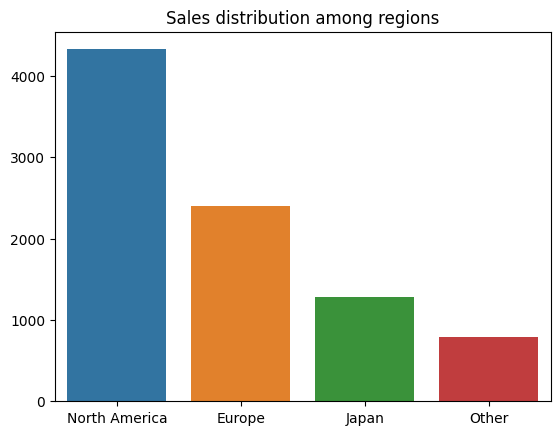

In [28]:
sns.barplot(data = df_sales_geo)
plt.title('Sales distribution among regions')

In [33]:
# North America clearly represents the biggest market for video games.

<Axes: >

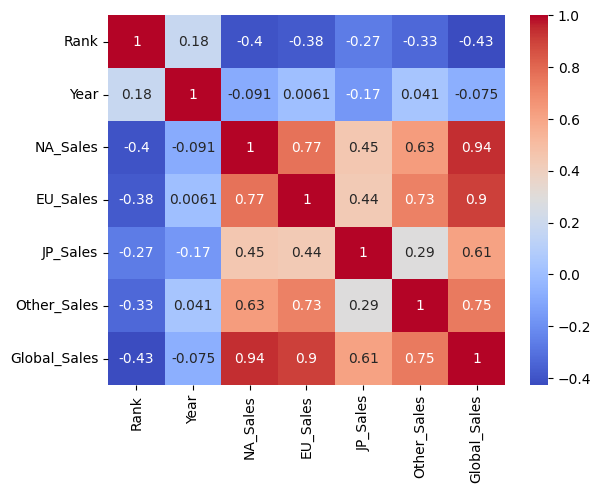

In [29]:
# How are global sales related to regional sales?
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
# The heatmap confirms what we saw with the previous bar plot: North America's sales are very much related to the global sales, being that region the biggest market for video games.
# Nevertheless, Europe sales are also strongly related to the global ones.
# We also notice a strong correlation between European, American and other sales.
# Japan's market, on the other hand, seems less related, in comparison.

In [ ]:
# Are there regional differences in game genre preferences?
df_genre_sales_geo = df.groupby(by=['Genre'])[['NA_Sales','EU_Sales', 'JP_Sales']].sum().reset_index(names='Genre')
df_genre_sales_geo.set_index('Genre', inplace=True)
df_genre_sales_geo

,NA_Sales,EU_Sales,JP_Sales
Genre,,,
Action,861.77,516.48,158.65
Adventure,101.93,63.74,51.99
Fighting,220.74,100.00,87.15
Misc,396.92,211.77,106.67
Platform,445.99,200.65,130.65
Puzzle,122.01,50.52,56.68
Racing,356.93,236.31,56.61
Role-Playing,326.50,187.57,350.29
Shooter,575.16,310.45,38.18


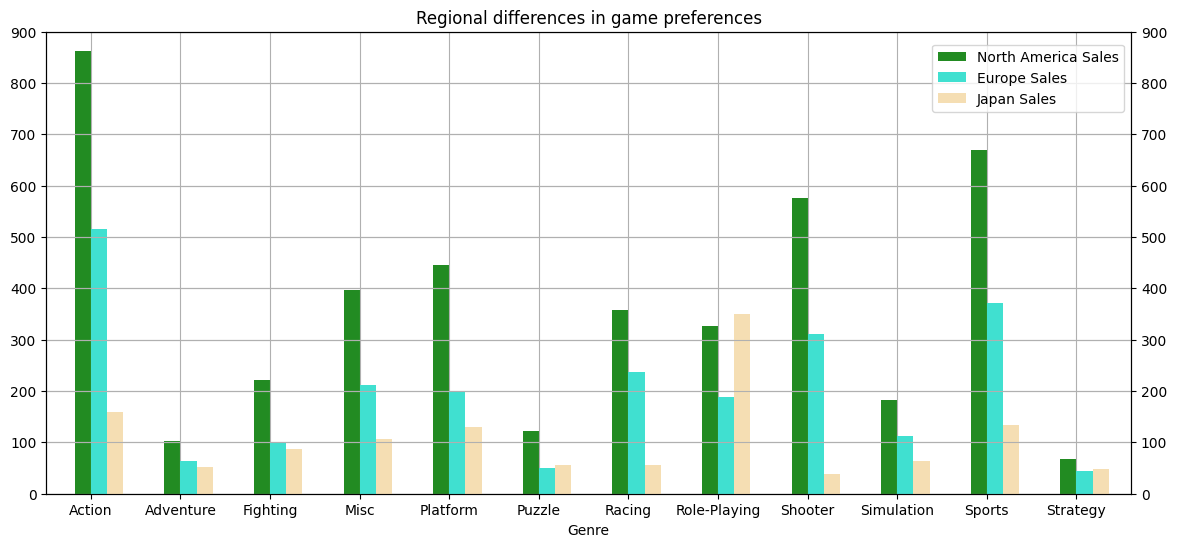

In [31]:
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = 0.18

df_genre_sales_geo.NA_Sales.plot(kind='bar', color='forestgreen',ax=ax, width = width, position=1, label = 'North America Sales')
df_genre_sales_geo.EU_Sales.plot(kind='bar', color='turquoise',ax=ax2, width = width, position=0, label = 'Europe Sales')
df_genre_sales_geo.JP_Sales.plot(kind='bar', color='wheat', ax=ax2, width = width, position=-1, label = 'Japan Sales')

ax.grid(True)
ax2.grid(True)

ax.set_xlabel('Genre')
ax.tick_params(labelrotation=0)

ax.set_ylim(0,900)
ax2.set_ylim(0,900)
ax.set_xlim(-0.5,)

fig.legend(bbox_to_anchor=(0.90, 0.87), loc='upper right')
plt.title('Regional differences in game preferences')

plt.show()

In [ ]:
# We can see that North America and Europe are quite similar in terms of genre preferencies, while Japan seems to have a more indipendent trend. We notice it very clearly with the 'Role-Playing' genre.

In [32]:
# What about publishers and platforms now:
df.nunique()

Rank            16291
Name            11325
Platform           31
Year               39
Genre              12
Publisher         576
NA_Sales          408
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      621
dtype: int64

In [33]:
# I see 31 different platforms and 576 different publishers.
# Let's see how is the distribution among platforms:
pl = df['Platform'].value_counts()
pl

Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of video games per platform')

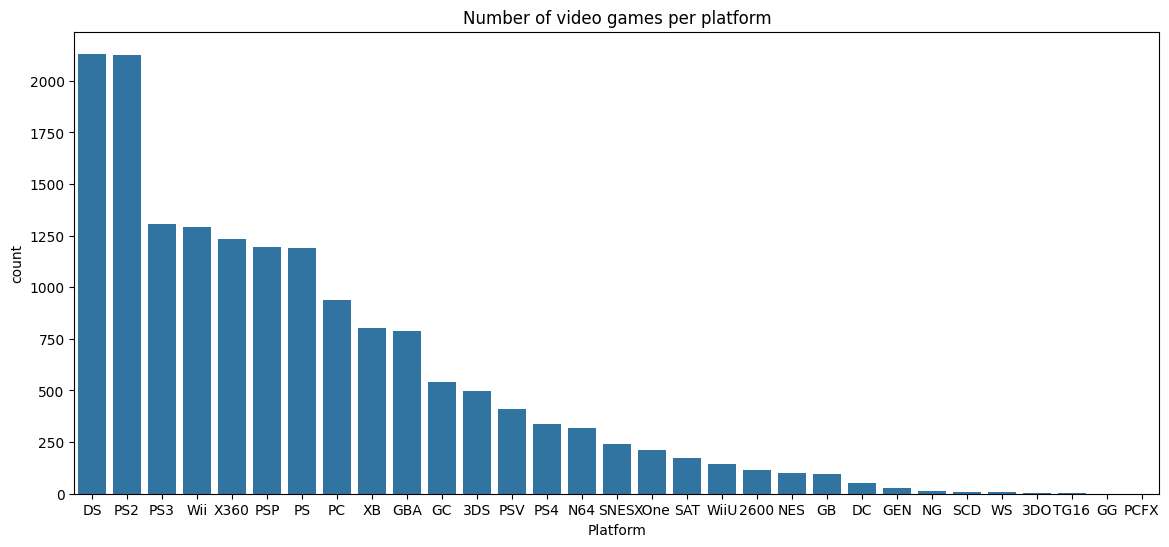

In [34]:
fig = plt.figure(figsize=(14, 6))
sns.barplot(data = pl).set_title("Number of video games per platform")

In [36]:
# I see that platforms 'DS' and 'PS2' are the ones hosting most games, with quite a difference from the third one (PS3) - more than 800 games difference. After that the list goes more gradually.

In [35]:
# Which platforms dominate sales in Japan vs Europe?
df_pl = df.groupby(by=['Platform'])[['NA_Sales','EU_Sales', 'JP_Sales']].sum().reset_index(names='Platform')
df_pl.set_index('Platform', inplace=True)
df_pl

,NA_Sales,EU_Sales,JP_Sales
Platform,,,
2600,80.78,4.86,0.00
3DO,0.00,0.00,0.10
3DS,78.03,58.29,97.30
DC,5.43,1.69,8.56
DS,388.53,194.05,175.02
GB,113.64,47.51,85.12
GBA,178.43,72.49,46.56
GC,131.94,38.32,21.34
GEN,19.27,5.52,2.67


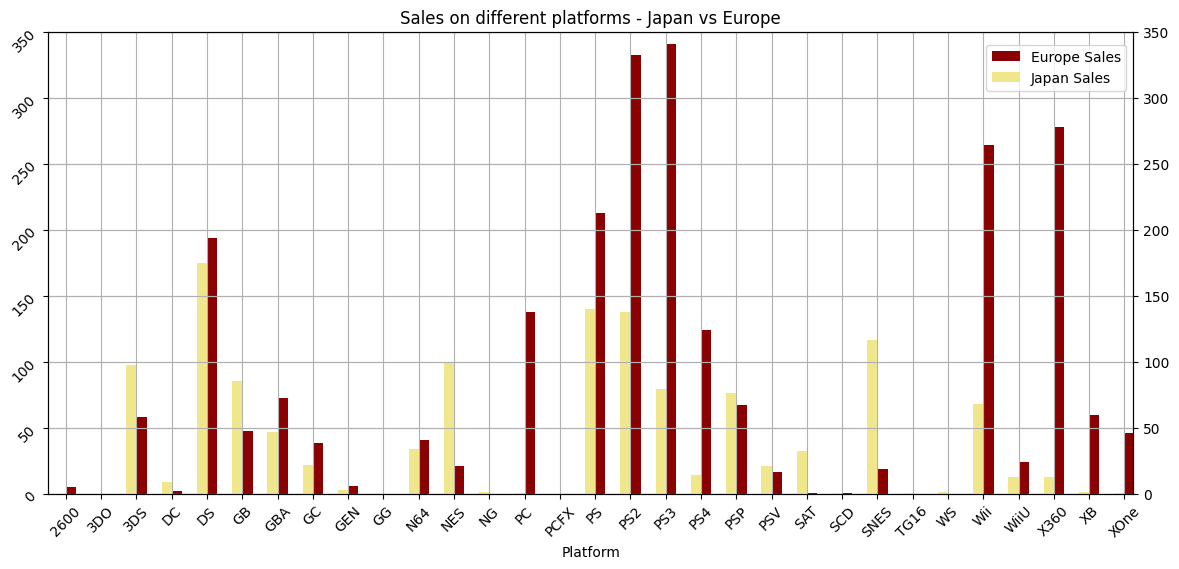

In [37]:
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = 0.29

df_pl.EU_Sales.plot(kind='bar', color='darkred',ax=ax, width = width, position=0, label = 'Europe Sales')
df_pl.JP_Sales.plot(kind='bar', color='khaki',ax=ax2, width = width, position=1, label = 'Japan Sales')


ax.grid(True)
ax2.grid(True)

ax.set_xlabel('Platform')
ax.tick_params(labelrotation=45)

ax.set_ylim(0,350)
ax2.set_ylim(0,350)
ax.set_xlim(-0.5,)

fig.legend(bbox_to_anchor=(0.90, 0.87), loc='upper right')
plt.title('Sales on different platforms - Japan vs Europe')

plt.show()

In [ ]:
# While in Europe the strongest platforms are PS2 and PS3, in Japan the most used platform is DS.
# We can also notice the particular behaviour of X360: extremely popular in Europe (third most used platform) but very poorly used in Japan.
# Therefore we can conclude that the video game market and the platforms involved change considerably depending on the geographic area.

In [38]:
# I want to see how is the game distribution among publishers too, but they're too many.
df['Publisher'].value_counts()

Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
King Records                       1
Graphsim Entertainment             1
Takuyo                             1
Inti Creates                       1
Commseed                           1
Name: count, Length: 576, dtype: int64

In [40]:
# So I decide to drop the rows of publishers with less than 10 games.
df_pu = df.groupby(by=['Publisher'])['Publisher'].count().sort_values(ascending=False).reset_index(name='Count')
df_pu = df_pu[df_pu.Count > 10]
df_pu

,Publisher,Count
0,Electronic Arts,1339
1,Activision,966
2,Namco Bandai Games,928
3,Ubisoft,918
4,Konami Digital Entertainment,823
...,...,...
138,Metro 3D,12
139,Irem Software Engineering,12
140,Sammy Corporation,11
141,Hudson Entertainment,11


In [41]:
# Still too many (143) so I'll reduce even more:
df_pu = df_pu[df_pu.Count > 50]
df_pu

,Publisher,Count
0,Electronic Arts,1339
1,Activision,966
2,Namco Bandai Games,928
3,Ubisoft,918
4,Konami Digital Entertainment,823
5,THQ,712
6,Nintendo,696
7,Sony Computer Entertainment,682
8,Sega,632
9,Take-Two Interactive,412


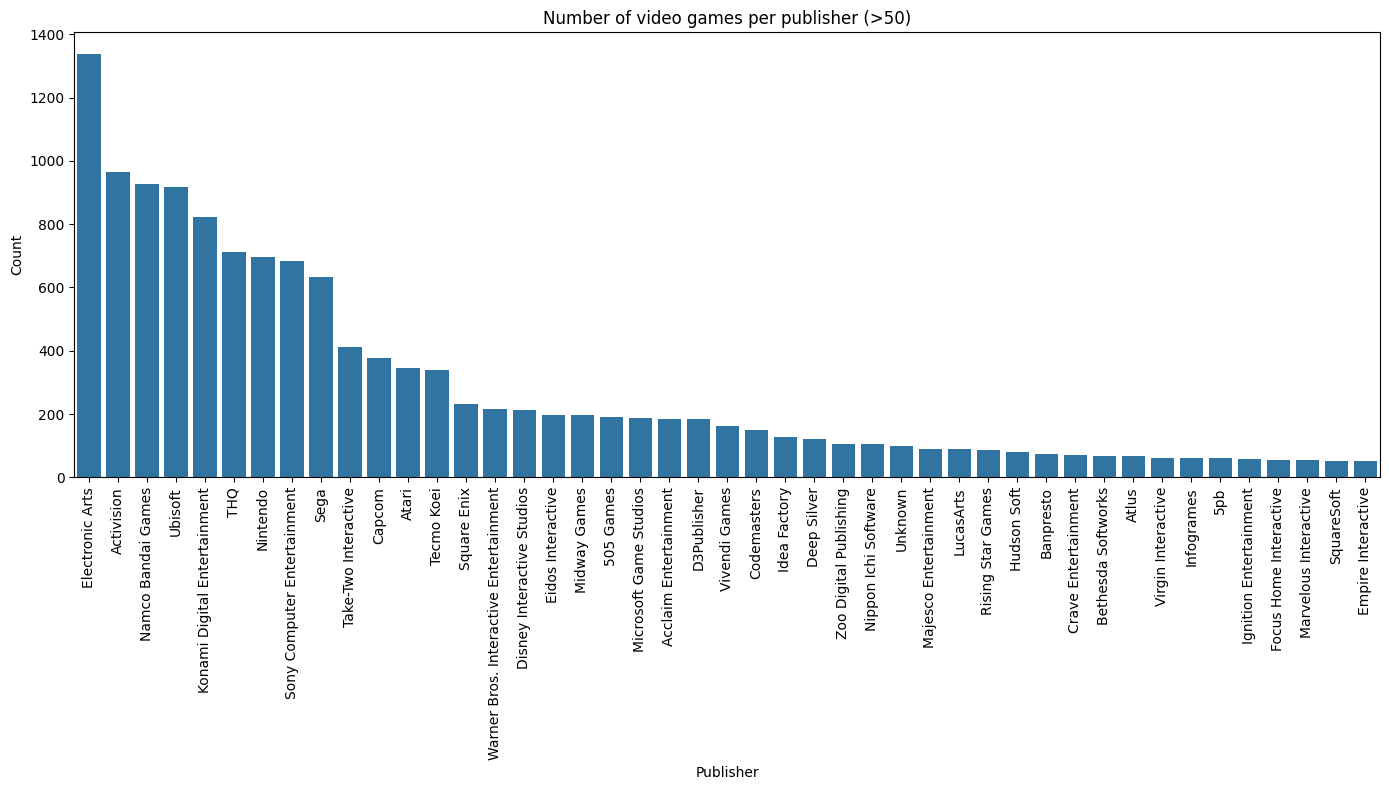

In [42]:
fig = plt.figure(figsize=(14, 8))
sns.barplot(x='Publisher', y='Count', data = df_pu).set_title("Number of video games per publisher (>50)")
plt.xticks(plt.xticks()[0], rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
# I see one very prolific publisher (Electronic Arts, more than 1300 games) followed by 8 very active ones with more than 500 games.
# After this, the list of publishers dicreases gradually.

In [66]:
# I'll focus now on Nintendo data only:
df_N = df[df['Publisher']=='Nintendo']
df_N

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16269,16272,Slide Adventure: Mag Kid,DS,2007.0,Action,Nintendo,0.00,0.00,0.01,0.00,0.01
16357,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015.0,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01
16456,16459,Art Academy: Home Studio,WiiU,2015.0,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01
16473,16476,Captain Rainbow,Wii,2008.0,Adventure,Nintendo,0.00,0.00,0.01,0.00,0.01


In [67]:
# What are the sales of this publisher?
EU_sales_N = round(df_N['EU_Sales'].sum(), 2)
NA_sales_N = round(df_N['NA_Sales'].sum(), 2)
JP_sales_N = round(df_N['JP_Sales'].sum(), 2)
Gl_sales_N = round(df_N['Global_Sales'].sum(), 2)
print('Nintendo publisher has a total of ' + str(EU_sales_N) + ' European sales, ' + str(NA_sales_N) + ' American sales and ' + str(JP_sales_N) + ' Japanese sales, for a global amount of ' + str(Gl_sales_N))

Nintendo publisher has a total of 418.3 European sales, 815.75 American sales and 454.99 Japanese sales, for a global amount of 1784.43


In [68]:
# How many games did Nintendo publish?
df_N.shape[0]

696

In [69]:
# With how many platforms does Nintendo collaborate?
df_N['Platform'].nunique()

10

In [70]:
df_N['Platform'].value_counts()

Platform
DS      149
GBA      91
3DS      82
Wii      81
GB       60
N64      59
GC       53
NES      45
WiiU     40
SNES     36
Name: count, dtype: int64

In [71]:
# Are these all the platform in the whole video game scene or there are platforms that Nintendo doesn't use?
df['Platform'].nunique()

31

In [72]:
# Nintendo uses 10 out of 31 existing platforms.
# I want to see now the distribution of Nintendo games over different platforms:

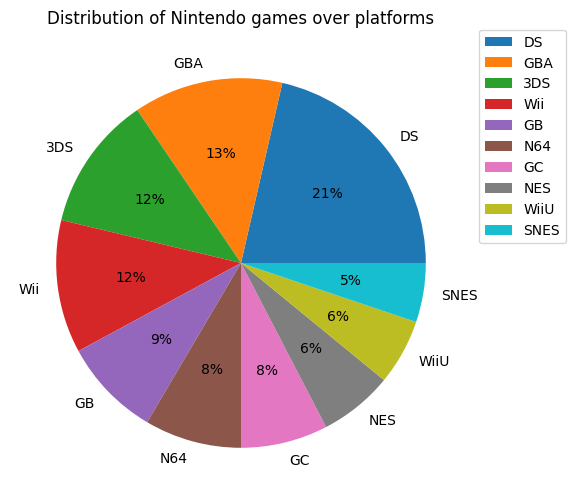

In [73]:
df_N_pl = df_N.groupby(['Platform'])['Platform'].count().sort_values(ascending=False).reset_index(name='Count')
df_N_pl.set_index('Platform', inplace=True)
ax = df_N_pl.plot(kind='pie', y='Count', autopct='%1.0f%%', ylabel='', legend=True, figsize=(6,6))
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Distribution of Nintendo games over platforms')
plt.show()

In [74]:
# Now I want to see the 10 most sold Nintendo games
df_N_10 = df_N.head(10)
df_N_10

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


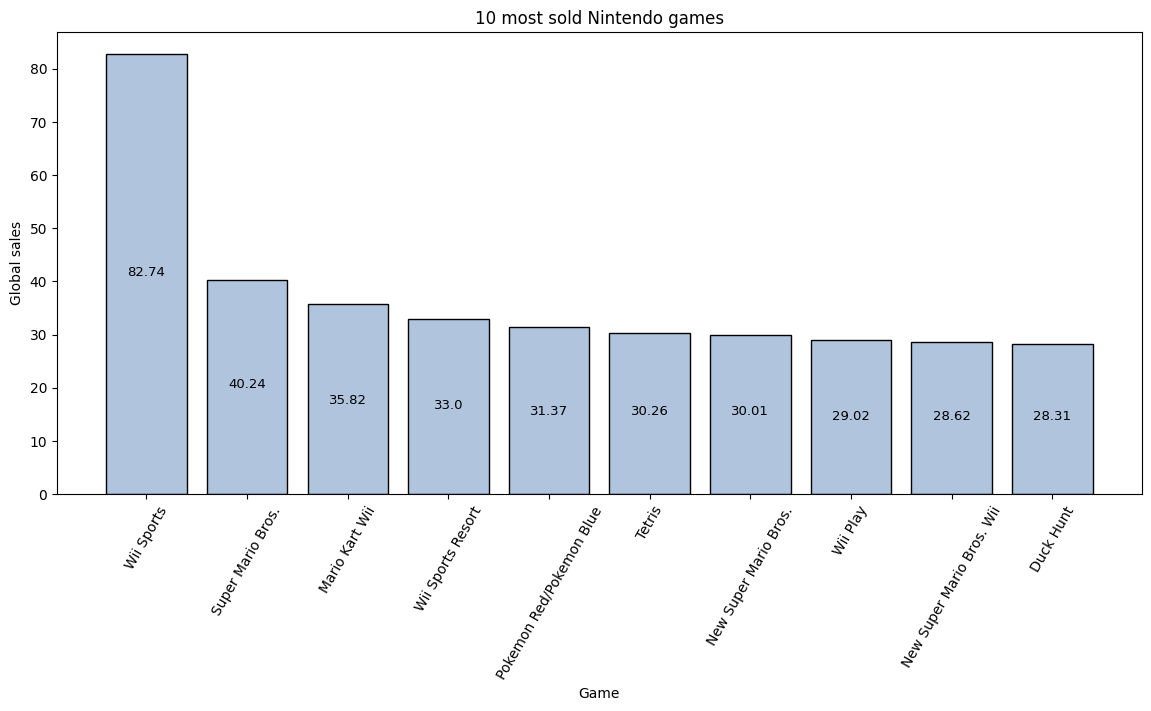

In [75]:
plt.figure(figsize=(14, 6))
plt.bar(df_N_10['Name'], df_N_10['Global_Sales'], color = 'lightsteelblue', edgecolor = 'black')
add_labels(df_N_10['Name'], df_N_10['Global_Sales'])
plt.title('10 most sold Nintendo games')
plt.xlabel('Game')
plt.ylabel('Global sales')
plt.xticks(plt.xticks()[0], rotation=60)
plt.show()


In [76]:
# The plot shows how the game 'Wii Sports' is the most profitable with more than double sales compared to the second most sold, 'Super Mario Bros.'.
# Which platform is it on?
df_N[df_N['Name']=='Wii Sports']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [77]:
# How did Nintendo sales go over time?
df_N_sales_per_year = df_N.groupby(by=['Year'])['Global_Sales'].sum().reset_index(name='Sales Count')
df_N_sales_per_year.head()

,Year,Sales Count
0,1983.0,10.96
1,1984.0,45.56
2,1985.0,49.95
3,1986.0,16.18
4,1987.0,11.95


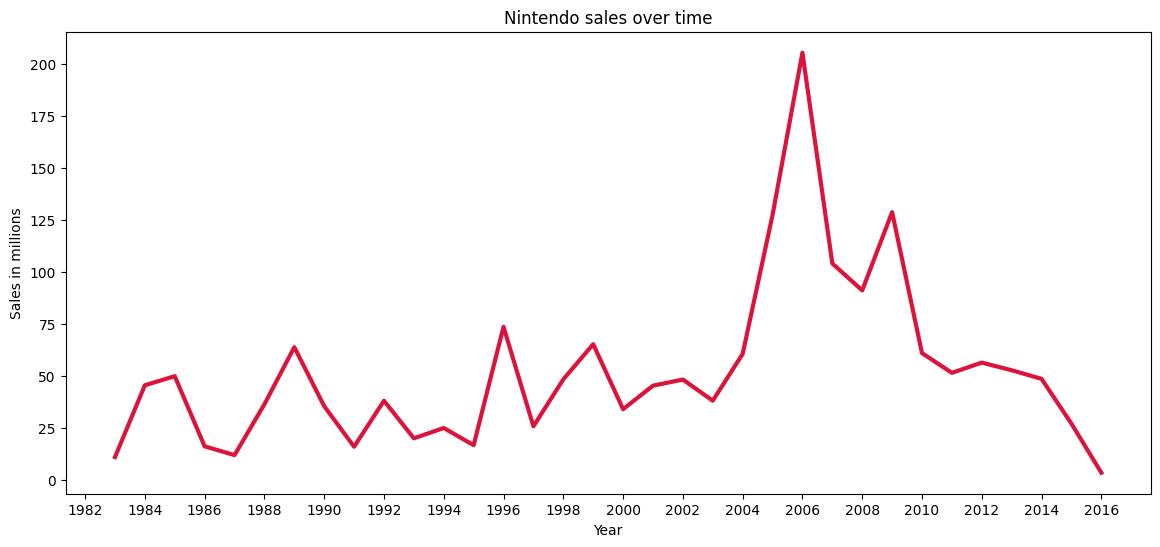

In [78]:
plt.figure(figsize=(14, 6))
plt.plot(df_N_sales_per_year['Year'], df_N_sales_per_year['Sales Count'], color = 'crimson', linewidth = 3)
plt.title('Nintendo sales over time')
plt.xlabel('Year')
plt.ylabel('Sales in millions')
plt.xticks(np.arange(1982, 2017, step=2))
plt.show()

In [79]:
# The year with more sales is indeed 2006, release year of the most profitable game 'Wii Sports'
# I want to see how this is distributed geographically:
df_N_eu_sales_per_year = df_N.groupby(by=['Year'])['EU_Sales'].sum().reset_index(name='EU Sales Count')
df_N_eu_sales_per_year.head()

,Year,EU Sales Count
0,1983.0,0.46
1,1984.0,1.95
2,1985.0,4.54
3,1986.0,1.73
4,1987.0,1.18


In [80]:
df_N_na_sales_per_year = df_N.groupby(by=['Year'])['NA_Sales'].sum().reset_index(name='NA Sales Count')
df_N_na_sales_per_year.head()

,Year,NA Sales Count
0,1983.0,2.32
1,1984.0,32.57
2,1985.0,32.48
3,1986.0,6.73
4,1987.0,5.13


In [81]:
df_N_jp_sales_per_year = df_N.groupby(by=['Year'])['JP_Sales'].sum().reset_index(name='JP Sales Count')
df_N_jp_sales_per_year.head()

,Year,JP Sales Count
0,1983.0,8.10
1,1984.0,10.36
2,1985.0,12.02
3,1986.0,7.45
4,1987.0,5.46


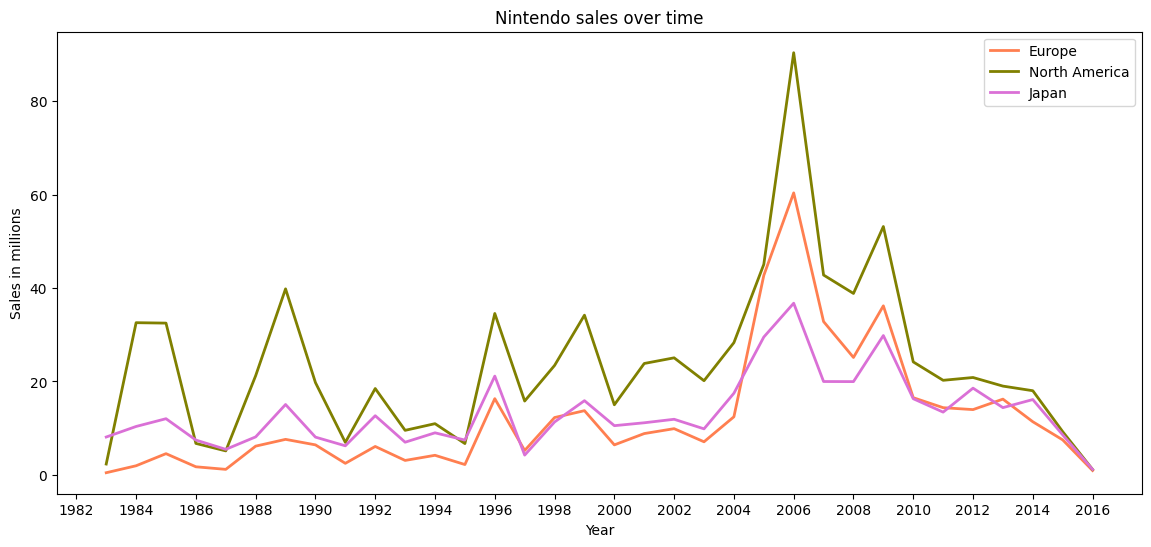

In [82]:
plt.figure(figsize=(14, 6))
plt.plot(df_N_sales_per_year['Year'], df_N_eu_sales_per_year['EU Sales Count'], color = 'coral', linewidth = 2, label ='Europe')
plt.plot(df_N_sales_per_year['Year'], df_N_na_sales_per_year['NA Sales Count'], color = 'olive', linewidth = 2, label = 'North America')
plt.plot(df_N_sales_per_year['Year'], df_N_jp_sales_per_year['JP Sales Count'], color = 'orchid', linewidth = 2, label = 'Japan')
plt.title('Nintendo sales over time')
plt.xlabel('Year')
plt.ylabel('Sales in millions')
plt.xticks(np.arange(1982, 2017, step=2))
plt.legend()
plt.show()

In [83]:
# The year with most sales in all the regions is still 2006, for Nintendo.
# This is not exactly aligned with the result of our first line plot about global sales over time, where the peak was in 2008, but it reflects a similar general trend.
# Again, we notice how the Japanese market differs from the European and American ones: 2006 is still a peak for Japan's sales, but way lower compared to the European and American jumps.
# This is because, even though the Wii Sports game was the most popular and most sold globally for Nintendo, it was not the same in Japan:

df_N_J = df_N.sort_values('JP_Sales', ascending=False)
df_N_J_10 = df_N_J.head(10)
df_N_J_10

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
12,13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
26,27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
25,26,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85
41,42,Animal Crossing: Wild World,DS,2005.0,Simulation,Nintendo,2.55,3.52,5.33,0.88,12.27
27,28,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,Nintendo,3.44,5.36,5.32,1.18,15.30
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


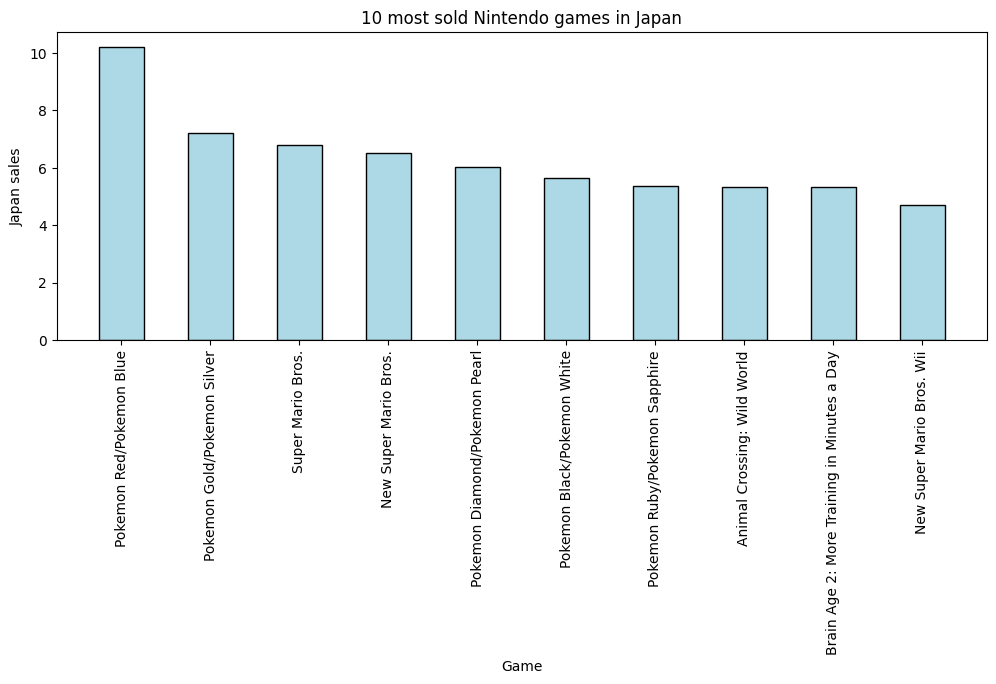

In [84]:
plt.figure(figsize=(12, 4))
plt.bar(df_N_J_10['Name'], df_N_J_10['JP_Sales'], color = 'lightblue', edgecolor = 'black', width=0.5)
plt.title('10 most sold Nintendo games in Japan')
plt.xlabel('Game')
plt.ylabel('Japan sales')
plt.xticks(plt.xticks()[0], rotation=90)
plt.show()

In [ ]:
# Not only 'Wii sports' doesn't appear among the most sold games in Japan, but we can also notice a drastic difference in taste:
# 'Pokemon' games dominate the ranking in Japan, even if, in the global Nintendo sales, only one Pokemon game appears in the top 10.
# This suggests to adopt different strategies when considering Japan's market or any other market.

In [ ]:
# -- -- -- -- -- -- --

# This was a first attempt of Exploratory Data Analysis on a real world data set, and it can easily be the starting point for further and deeper investigations.